In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#imports
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
pwd

'/tf/notebooks/final-project/EDA'

In [4]:
descr = pd.read_csv('../data/QA/full_descr.txt', sep="|")
descr[:15]

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
0,970000005,19810105,201,34,97105301.0,R,97,S,IL,W,63.0,0.0,0.0,0.0,Mr. PERCY,"PERCY, CHARLES",exact
1,970000006,19810105,202,34,97105071.0,D,97,S,KY,W,56.0,0.0,0.0,0.0,Mr. HUDDLESTON,"HUDDLESTON, WALTER",exact
2,970000007,19810105,201,34,97106761.0,D,97,S,WA,W,70.0,0.0,0.0,0.0,Mr. JAcKSON,"JACKSON, HENRY",exact
3,970000008,19810105,201,34,97106981.0,R,97,S,VT,W,69.0,0.0,0.0,0.0,Mr. STAFFORD,"STAFFORD, ROBERT",exact
4,970000010,19810105,49,9,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact
5,970000012,19810105,111,17,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact
6,970000013,19810105,100,18,97107681.0,D,97,S,CA,W,68.0,0.0,0.0,0.0,Mr. CRANSTON,"CRANSTON, ALAN",exact
7,970000015,19810105,2591,358,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact
8,970000016,19810105,105,17,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact
9,970000019,19810105,1426,250,97104811.0,R,97,S,TN,W,57.0,0.0,0.0,0.0,Mr. BAKER,"BAKER, HOWARD",exact


In [5]:
descr.shape

(2914464, 17)

In [8]:
descr[descr['speech_id'].duplicated()].shape

(68797, 17)

In [11]:
descr[descr['speech_id'].duplicated()].head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
2585820,970000461,19810105,526,94,97110170.0,D,97,H,CA,W,67.0,0.0,0.0,0.0,Mr. EDWARDS of California,"EDWARDS, WILLIAM",fuzzy
2585821,970000461,19810105,526,94,97106650.0,R,97,H,AL,W,54.0,0.0,0.0,0.0,Mr. EDWARDS of California,"EDWARDS, WILLIAM",fuzzy
2585837,970000476,19810105,2808,456,97111520.0,R,97,H,WI,W,44.0,1.0,0.0,0.0,Mr. ROTH,"ROTH, TOBY",fuzzy
2585854,970000606,19810106,7,2,97107550.0,D,97,H,MO,W,59.0,0.0,0.0,0.0,Mr. YOUNG of Alaska,"YOUNG, ROBERT",fuzzy
2585855,970000606,19810106,7,2,97121820.0,R,97,H,AK,W,49.0,1.0,0.0,0.0,Mr. YOUNG of Alaska,"YOUNG, DON",fuzzy


In [12]:
descr[descr['speech_id'].duplicated()].match.value_counts()

fuzzy    68797
Name: match, dtype: int64

In [7]:
descr['NonWhite'].sum()

207997.0

In [8]:
descr['Female'].sum()

200045.0

In [9]:
descr['Age_lt_med'].sum()

866718.0

### Word count distribution by congress

In [23]:
descr.word_count.min(), np.percentile(descr.word_count, 10), descr.word_count.mean(), descr.word_count.median(), descr.word_count.max(), np.percentile(descr.word_count, 99)

(1, 7.0, 218.46652669746814, 43.0, 22613, 2049.0)

In [38]:
word_count = np.clip(descr.word_count, 0, np.percentile(descr.word_count, 99))

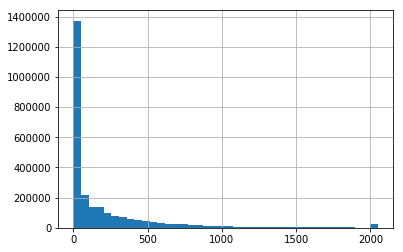

In [39]:
word_count.hist(bins=40)

In [43]:
congresses = pd.DataFrame()
congresses['percentile'] = list(range(0,101, 10))
for c in range(97,115):
    temp = descr[descr.Congress==c]
    pct = [np.percentile(temp.word_count, p) for p in range(0,101, 10)]
    congresses[c] = pct

In [44]:
congresses_t = congresses.T[1:]
congresses_t.columns = congresses.percentile
congresses_t

percentile,0,10,20,30,40,50,60,70,80,90,100
97,1.0,6.0,9.0,13.0,18.0,29.0,52.0,105.0,216.0,447.0,11750.0
98,1.0,6.0,9.0,13.0,19.0,31.0,57.0,118.0,233.0,468.0,11882.0
99,1.0,6.0,10.0,14.0,20.0,33.0,62.0,133.0,255.0,504.0,15777.0
100,1.0,6.0,10.0,15.0,21.0,35.0,66.0,147.0,282.0,535.0,12766.0
101,1.0,7.0,11.0,15.0,23.0,40.0,82.0,180.0,317.0,586.0,10068.0
102,1.0,7.0,11.0,16.0,24.0,44.0,95.0,196.0,336.0,612.0,17309.0
103,1.0,7.0,11.0,16.0,25.0,44.0,93.0,186.0,321.0,605.0,10027.0
104,1.0,7.0,11.0,15.0,24.0,43.0,91.0,178.0,311.0,599.0,12555.0
105,1.0,7.0,12.0,16.0,26.0,47.0,106.0,203.0,364.0,660.0,14321.0
106,1.0,7.0,12.0,17.0,27.0,48.0,112.0,213.0,373.0,669.0,13325.0


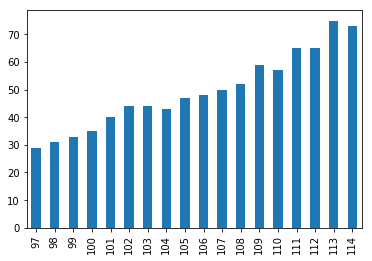

In [49]:
# median word count by congress
_ = congresses_t[50].plot.bar()

### Word count by target variables

In [51]:
descr[['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,517473664
1.0,47438610


In [52]:
descr[['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,510725189
1.0,54187085


In [53]:
descr[['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,363832066
1.0,201080208


### Speeches longer than median word count

In [54]:
# get median by congress
med = descr[['word_count','Congress']].groupby(['Congress']).median().reset_index()
med.columns = ['Congress', 'word_count_med']
descr = descr.merge(med, how='left', on='Congress')
descr['word_count_med'].describe()

count    2.585807e+06
mean     4.554031e+01
std      1.234541e+01
min      2.900000e+01
25%      3.500000e+01
50%      4.400000e+01
75%      5.200000e+01
max      7.500000e+01
Name: word_count_med, dtype: float64

In [55]:
descr['word_count_ge_med'] = descr.apply(lambda row: 0 if row['word_count'] < row['word_count_med'] else 1, axis=1)
descr['word_count_ge_med'].mean()

0.5017439429934253

In [61]:
descr[(descr.word_count_ge_med==1) & (descr.NonWhite==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.NonWhite==0)]['speakerid'].nunique()

(1245, 8591)

In [62]:
descr[(descr.word_count_ge_med==1) & (descr.Female==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.Female==0)]['speakerid'].nunique()

(1127, 8709)

In [63]:
descr[(descr.word_count_ge_med==1) & (descr.Age_lt_med==1)]['speakerid'].nunique(), descr[(descr.word_count_ge_med==1) & (descr.Age_lt_med==0)]['speakerid'].nunique()

(4745, 5091)

In [65]:
descr[descr.word_count_ge_med==1].NonWhite.value_counts()

0.0    1185514
1.0    111899 
Name: NonWhite, dtype: int64

In [66]:
descr[descr.word_count_ge_med==1].Female.value_counts()

0.0    1181458
1.0    115955 
Name: Female, dtype: int64

In [67]:
descr[descr.word_count_ge_med==1].Age_lt_med.value_counts()

0.0    824203
1.0    473210
Name: Age_lt_med, dtype: int64

In [68]:
descr[descr.word_count_ge_med==1][['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,498269695
1.0,45737711


In [69]:
descr[descr.word_count_ge_med==1][['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,491357155
1.0,52650251


In [70]:
descr[descr.word_count_ge_med==1][['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,349183000
1.0,194824406


### Fuzzy match on last name, gender, congress

In [74]:
fuzzy = pd.read_csv('../data/QA/full_descr_fuzzy.txt', sep="|")
fuzzy.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name
0,970000418,19810105,1059,176,97105830.0,R,97,W,46.0,1.0,0.0,0.0,Mr. DAN DANIEL,"DANIEL, ROBERT"
1,970000450,19810105,40,7,97106010.0,R,97,W,61.0,0.0,0.0,0.0,Mr. FINDLEY,"FINDLEY, PAUL"
2,970000451,19810105,16,3,97108680.0,D,97,W,69.0,0.0,0.0,0.0,Mr. ANDERSON of California,"ANDERSON, GLENN"
3,970000452,19810105,18,3,97107630.0,D,97,W,37.0,1.0,0.0,0.0,Mr. BONER of Tennessee,"BONER, WILLIAM"
4,970000453,19810105,49,10,97108970.0,D,97,B/AAPIA,56.0,0.0,1.0,0.0,Mr. DYMALLY,"DYMALLY, MERVYN"


In [79]:
fuzzy.shape

(328657, 14)

In [76]:
fuzzy[fuzzy.NonWhite==1]['speakerid'].nunique(), fuzzy[fuzzy.NonWhite==0]['speakerid'].nunique()

(1125, 7652)

In [77]:
fuzzy[fuzzy.Female==1]['speakerid'].nunique(), fuzzy[fuzzy.Female==0]['speakerid'].nunique()

(954, 7823)

In [78]:
fuzzy[fuzzy.Age_lt_med==1]['speakerid'].nunique(), fuzzy[fuzzy.Age_lt_med==0]['speakerid'].nunique()

(4330, 4447)

In [80]:
fuzzy.NonWhite.value_counts()

0.0    282051
1.0    46606 
Name: NonWhite, dtype: int64

In [81]:
fuzzy.Female.value_counts()

0.0    297078
1.0    31579 
Name: Female, dtype: int64

In [82]:
fuzzy.Age_lt_med.value_counts()

0.0    170946
1.0    157711
Name: Age_lt_med, dtype: int64

In [84]:
fuzzy[['NonWhite', 'word_count']].groupby(['NonWhite']).sum()

,word_count
NonWhite,
0.0,95732325
1.0,16840362


In [85]:
fuzzy[['Female', 'word_count']].groupby(['Female']).sum()

,word_count
Female,
0.0,101393137
1.0,11179550


In [86]:
fuzzy[['Age_lt_med', 'word_count']].groupby(['Age_lt_med']).sum()

,word_count
Age_lt_med,
0.0,60299268
1.0,52273419
